In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing dataset
# file path : 'kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv'

dataset = pd.read_csv('supermarket_sales - Sheet1.csv')

In [3]:
# copying dataset
df = dataset.copy()

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.columns = ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating']

In [6]:
# no of rows and columns in dataset

print('Number of Rows in the dataset: {:>8}'.format(df.shape[0]))
print('Number of Columns in the dataset: {:>3}'.format(df.shape[1]))


Number of Rows in the dataset:     1000
Number of Columns in the dataset:  17


In [7]:
# dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [8]:
# Description of dataset
df.describe()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [9]:
# Missing values

df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

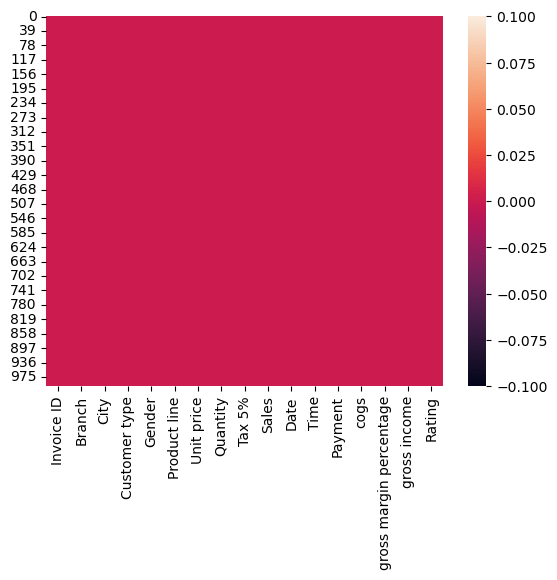

In [10]:
sns.heatmap(df.isnull())
plt.show()

## Outliers

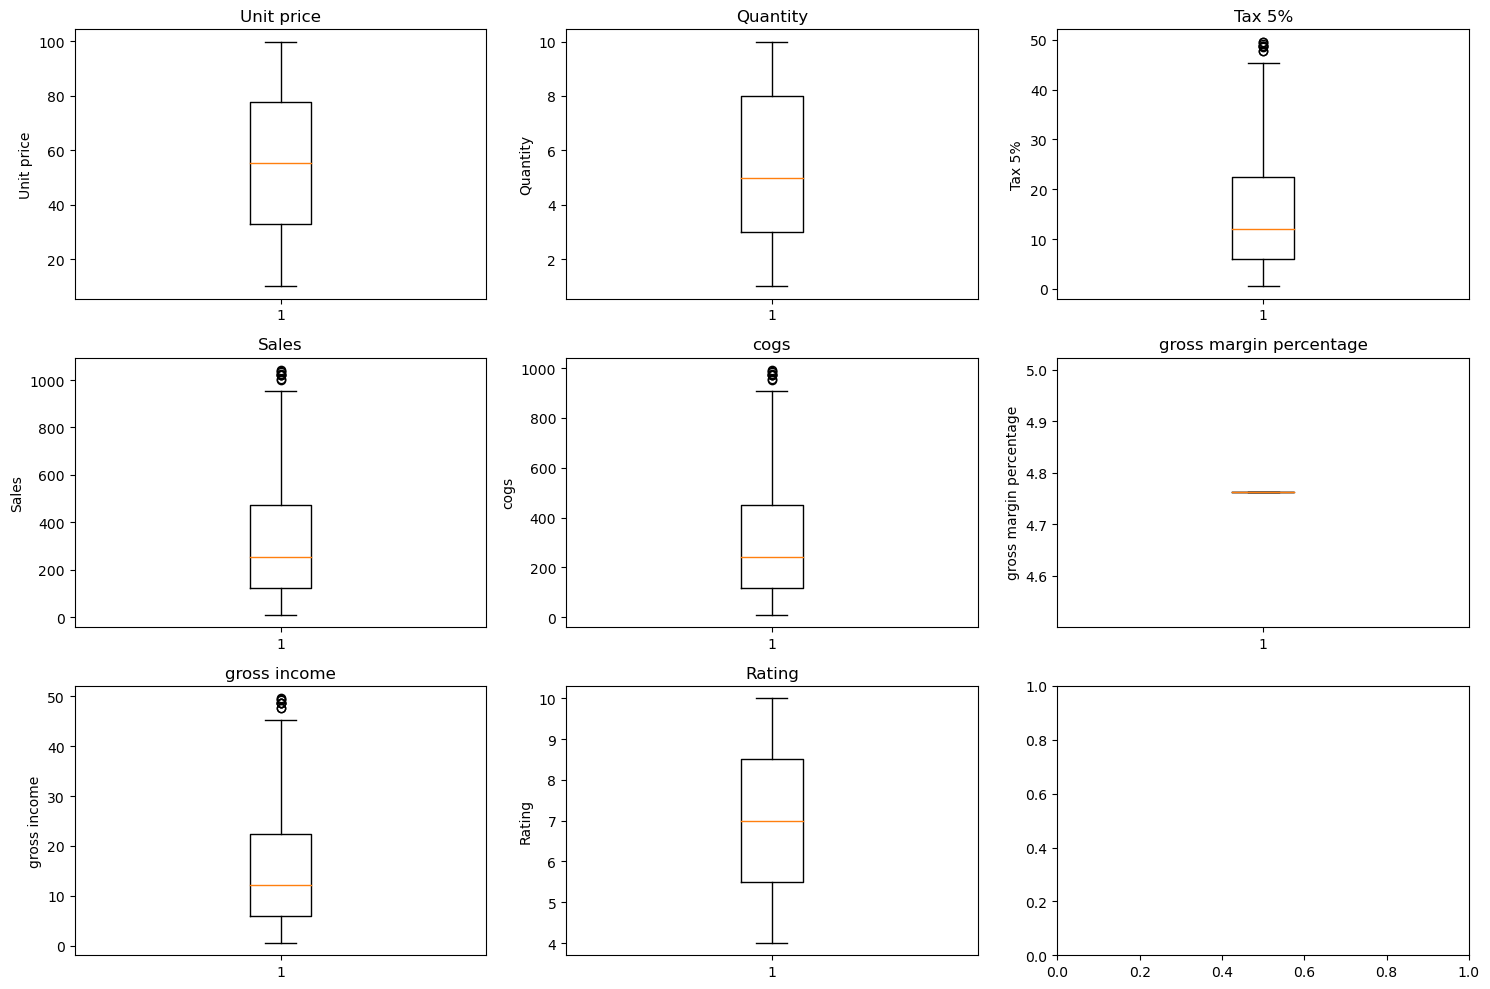

In [11]:
numerical_features = [column for column in df.columns if df[column].dtype != 'object']
num_cols = 3
num_rows = (len(numerical_features) - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, feature in enumerate(numerical_features):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].boxplot(df[feature])
    axes[row, col].set_ylabel(feature)
    axes[row, col].set_title(feature)

plt.tight_layout()
plt.show()

In [12]:
# Removing Outliers
df = df[df['Sales'] < 950]

## correlation

In [13]:
df.corr()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,-0.015807,0.621733,0.621733,0.621733,NaN,0.621733,-0.003672
Quantity,-0.015807,1.000000,0.697619,0.697619,0.697619,NaN,0.697619,-0.011048
Tax 5%,0.621733,0.697619,1.000000,1.000000,1.000000,NaN,1.000000,-0.028570
Sales,0.621733,0.697619,1.000000,1.000000,1.000000,NaN,1.000000,-0.028570
cogs,0.621733,0.697619,1.000000,1.000000,1.000000,NaN,1.000000,-0.028570
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.621733,0.697619,1.000000,1.000000,1.000000,NaN,1.000000,-0.028570
Rating,-0.003672,-0.011048,-0.028570,-0.028570,-0.028570,NaN,-0.028570,1.000000


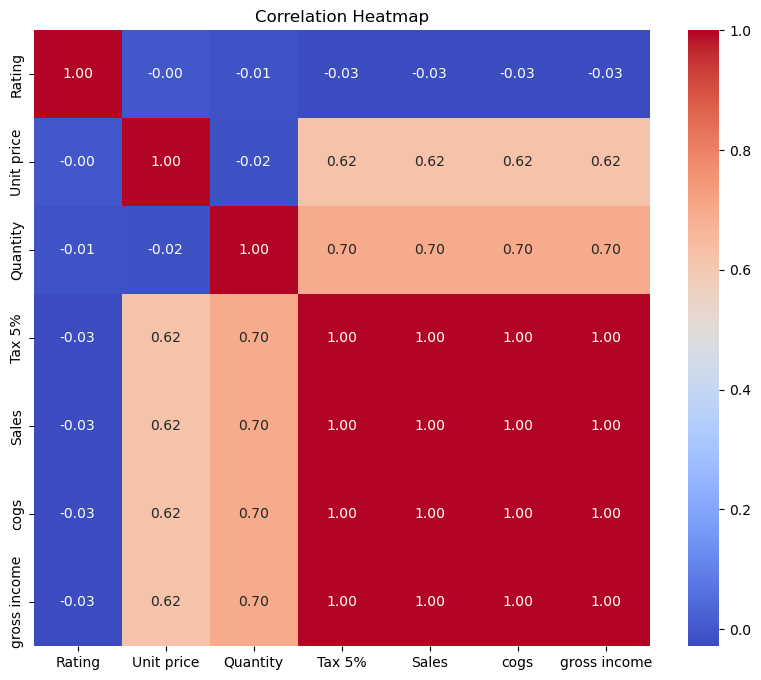

In [14]:
# Select the relevant columns from the dataframe for correlation plot
selected_columns = ['Rating', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'cogs', 'gross income']

# Create a subset dataframe with the selected columns
subset_df = df[selected_columns]

# Compute the correlation matrix
correlation_matrix = subset_df.corr()

# Generate the correlation heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

Based on the correlation matrix you provided, it appears that the "Rating" column has the highest absolute correlation value with any other feature. The highest absolute correlation value for "Rating" is 1.0 with itself, indicating a perfect positive correlation.

Therefore, based on the provided data, "Rating" can be considered a potential label or target variable in the dataset. It has a strong correlation with itself, suggesting that it might be a good candidate for a target variable to predict or analyze in relation to other features in the dataset.

## Features

In [15]:
features = [i for i in df.columns]
for i in features:
    cols = [i]
    categorical_features = [i for i in features if df[i].dtypes =='O' and i not in ['Invoice ID','Date','Time']]
    numerical_features   = [i for i in features if df[i].dtypes !='O']

## Categorical Features

In [16]:
print('no of unique values of each categorical features')

max_feature_length = max(len(feature) for feature in categorical_features)

for feature in categorical_features:
    unique_values = df[feature].nunique()
    formatted_feature = f"{feature}".ljust(max_feature_length + 2)
    formatted_value = str(unique_values).rjust(2)
    print(f"{formatted_feature}{formatted_value}")

no of unique values of each categorical features
Branch          3
City            3
Customer type   2
Gender          2
Product line    6
Payment         3


points to be considered from the above observation for ML algorithm:
    no. of Product line should be reduced,
    Date column should be changed into Month,
    Time column might be removed.

## Numerical Features

In [17]:
print('no of unique values of each numerical features')

max_feature_length = max(len(feature) for feature in numerical_features)

for feature in numerical_features:
    unique_values = df[feature].nunique()
    formatted_feature = f"{feature}".ljust(max_feature_length + 2)
    formatted_value = str(unique_values).rjust(2)
    print(f"{formatted_feature}{formatted_value}")

no of unique values of each numerical features
Unit price               932
Quantity                 10
Tax 5%                   979
Sales                    979
cogs                     979
gross margin percentage   1
gross income             979
Rating                   61


## Univariate Analysis

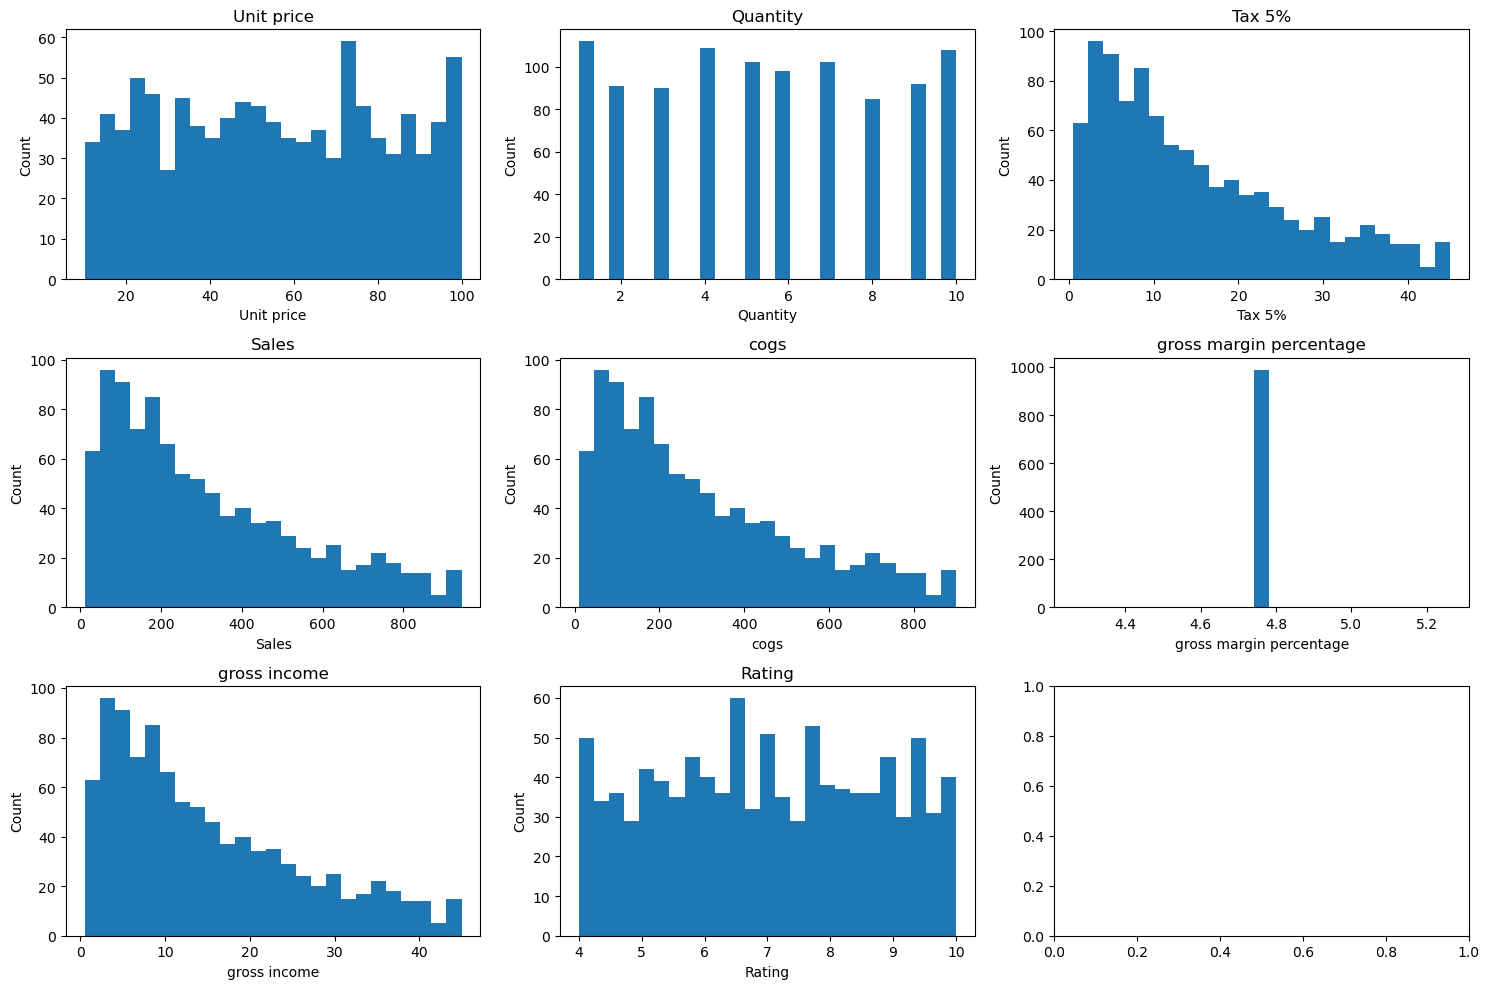

In [18]:
# Plotting Histogram for numerical(continous) features

num_cols = 3  # Number of columns in the subplot grid
num_rows = (len(numerical_features) - 1) // num_cols + 1  # Number of rows in the subplot grid

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, feature in enumerate(numerical_features):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].hist(df[feature], bins=25)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel("Count")
    axes[row, col].set_title(feature)

plt.tight_layout()
plt.show()

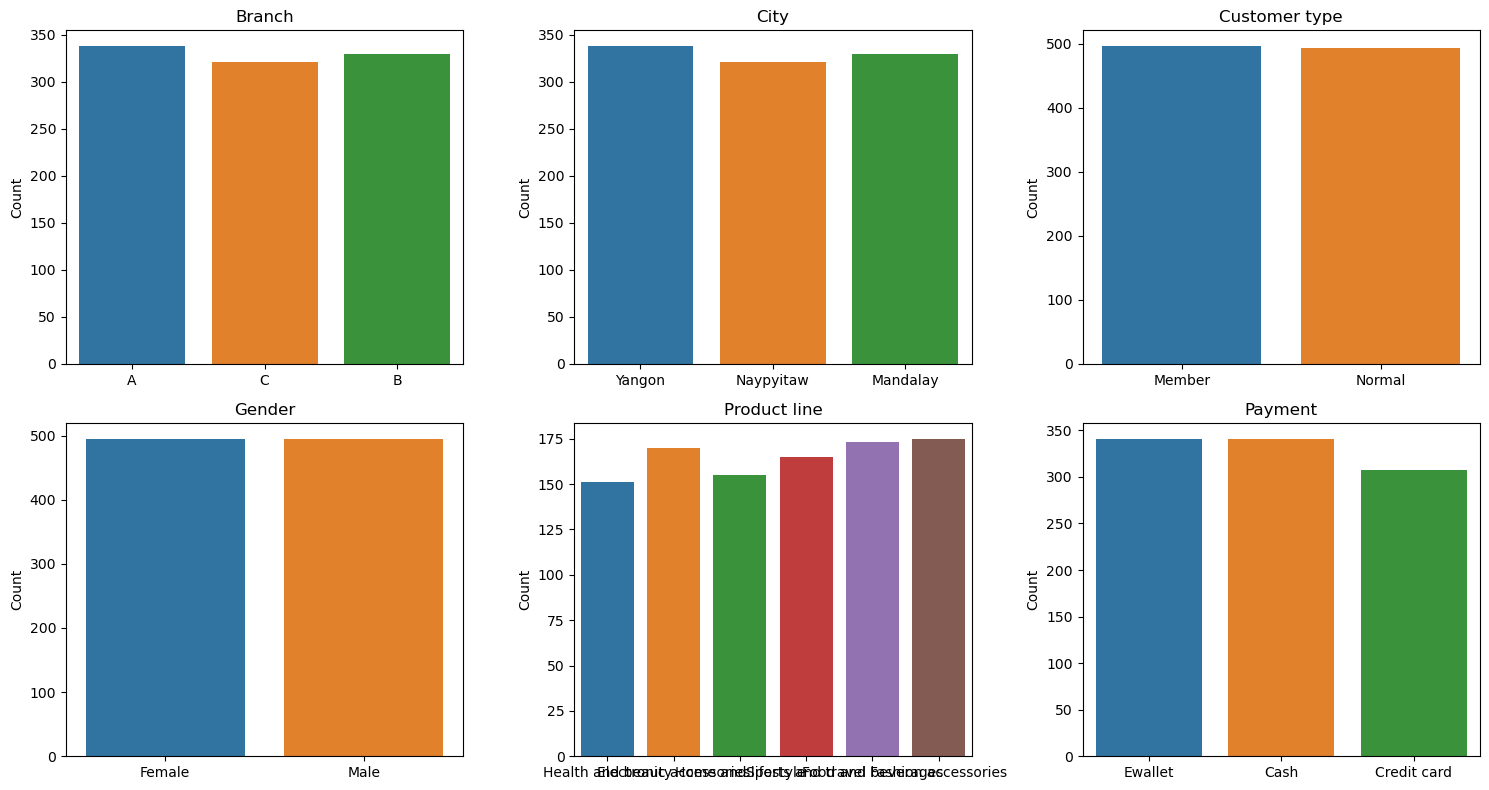

In [19]:
# Plotting Countplot for categorical features

num_features = len(categorical_features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

for i, feature in enumerate(categorical_features):
    row = i // num_cols
    col = i % num_cols
    sns.countplot(x=feature, data=df, ax=axes[row, col])
    axes[row, col].set_title(feature)
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('Count')

plt.tight_layout()
plt.show()

## Bivariate Analysis

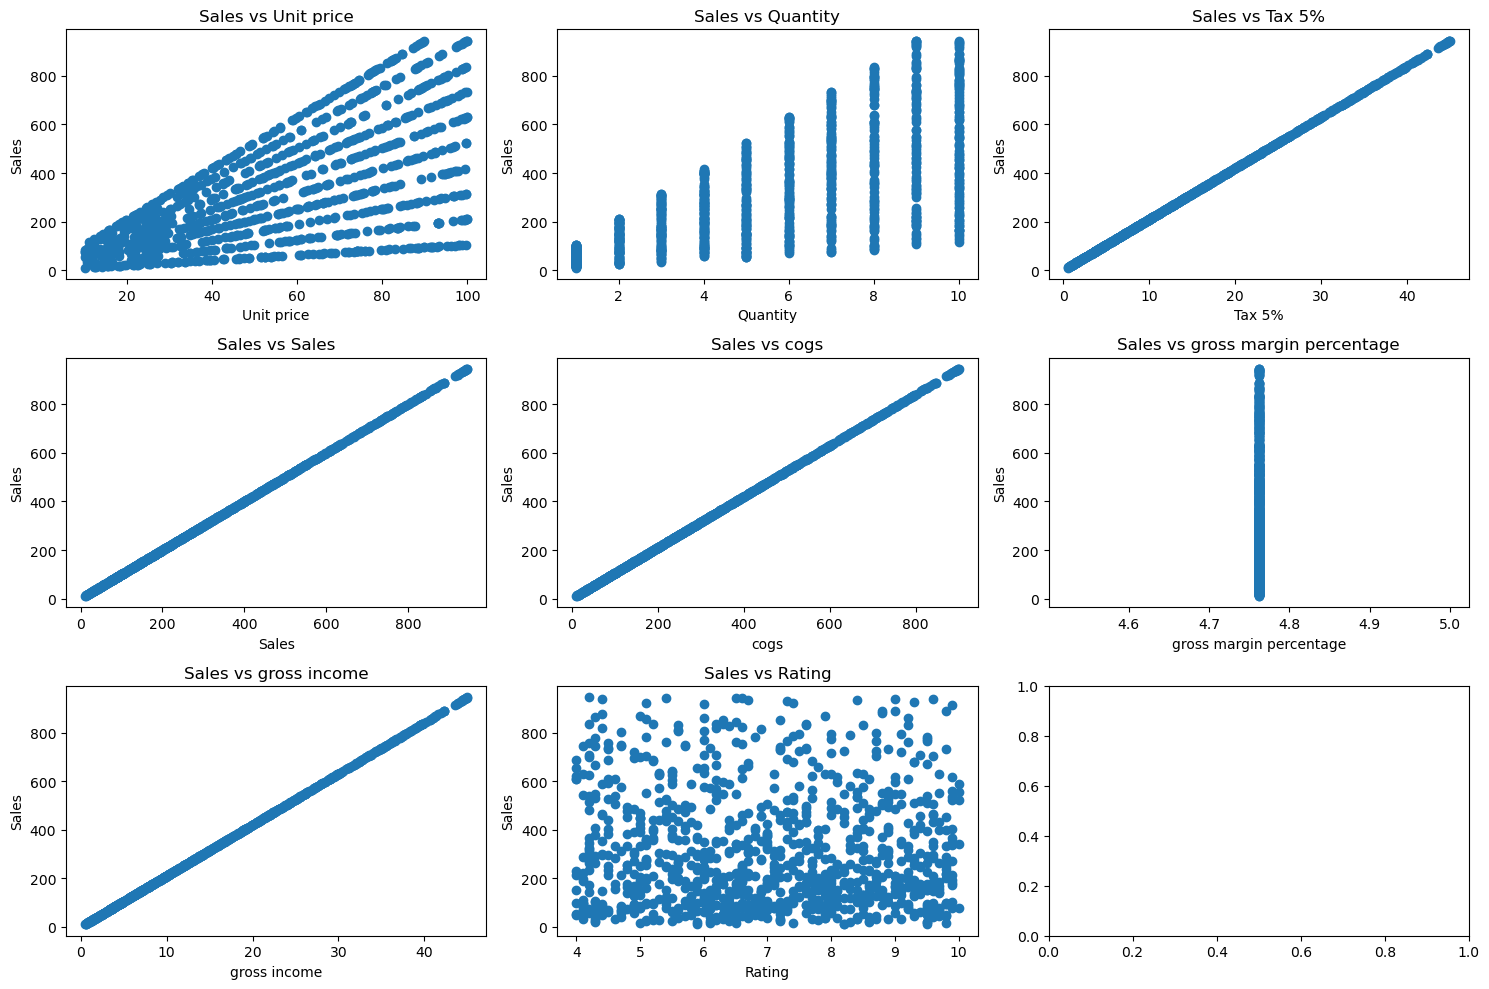

In [20]:
# target vs numerical_features
num_cols = 3  # Number of columns in the subplot grid
num_rows = (len(numerical_features) - 1) // num_cols + 1  # Number of rows in the subplot grid

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, feature in enumerate(numerical_features):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].scatter(df[feature], df['Sales'])
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Sales')
    axes[row, col].set_title(f'Sales vs {feature}')

plt.tight_layout()
plt.show()

<AxesSubplot:>

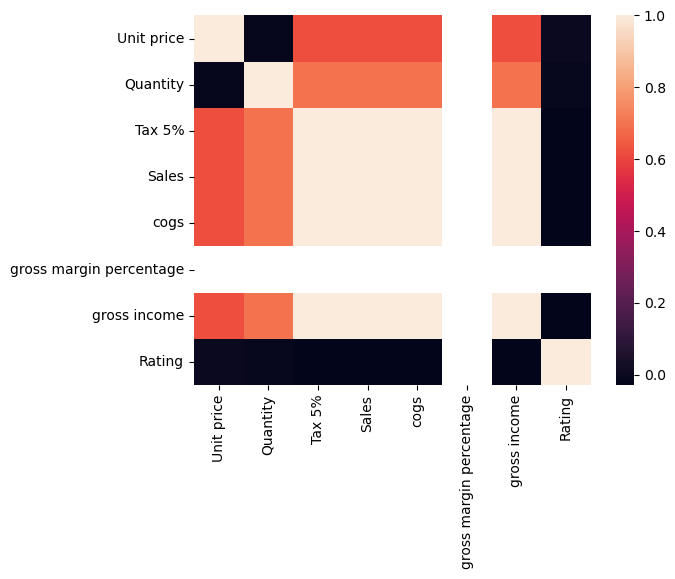

In [21]:
sns.heatmap(df.corr())

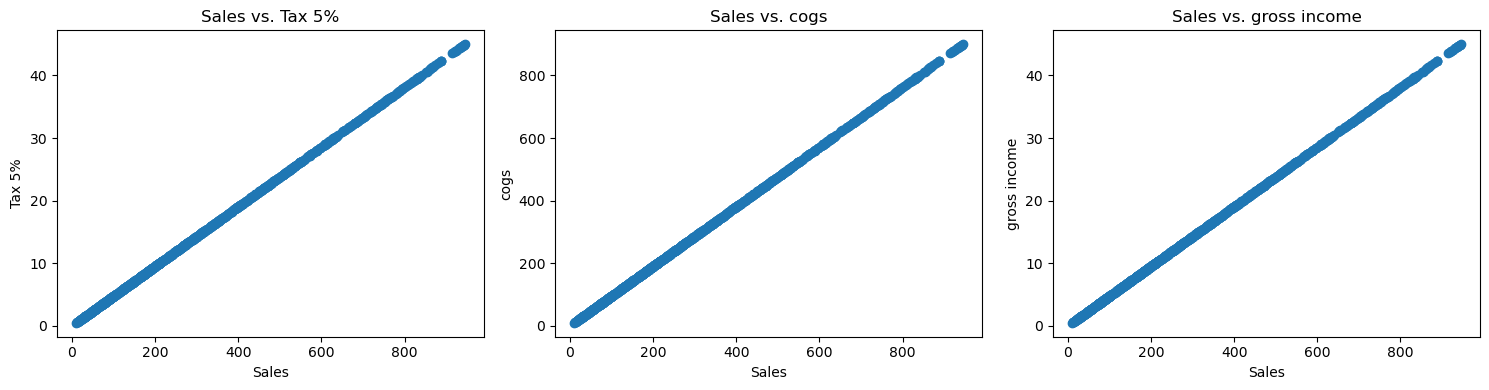

In [22]:
sub_total = ['Tax 5%', 'cogs', 'gross income']
num_subtotal = len(sub_total)
num_cols = 3
num_rows = (num_subtotal + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = np.array(axes).reshape(num_rows, num_cols)  # Reshape axes to 2D array

for i, subtotal in enumerate(sub_total):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].scatter(df['Sales'], df[subtotal])
    axes[row, col].set_title('Sales vs. ' + subtotal)
    axes[row, col].set_xlabel('Sales')
    axes[row, col].set_ylabel(subtotal)

plt.tight_layout()
plt.show()

In [23]:
df.corr()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,-0.015807,0.621733,0.621733,0.621733,NaN,0.621733,-0.003672
Quantity,-0.015807,1.000000,0.697619,0.697619,0.697619,NaN,0.697619,-0.011048
Tax 5%,0.621733,0.697619,1.000000,1.000000,1.000000,NaN,1.000000,-0.028570
Sales,0.621733,0.697619,1.000000,1.000000,1.000000,NaN,1.000000,-0.028570
cogs,0.621733,0.697619,1.000000,1.000000,1.000000,NaN,1.000000,-0.028570
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.621733,0.697619,1.000000,1.000000,1.000000,NaN,1.000000,-0.028570
Rating,-0.003672,-0.011048,-0.028570,-0.028570,-0.028570,NaN,-0.028570,1.000000


## Sales

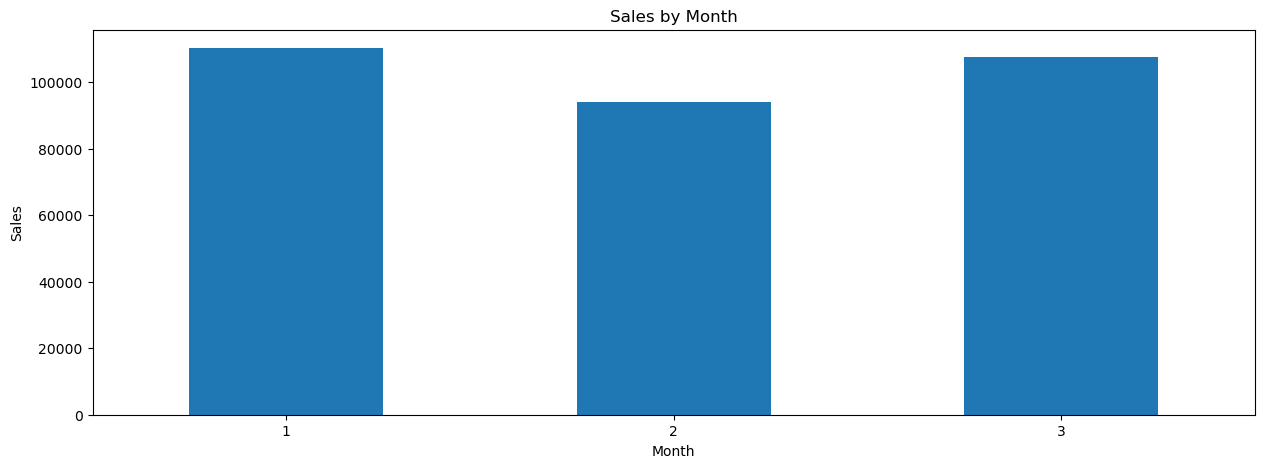

In [24]:
# Sales by Month

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month from the date column
df['Month'] = df['Date'].dt.month
df['Year']  = df['Date'].dt.year

# Group the data by month and calculate the sum of Sales for each month
monthly_sales = df.groupby('Month')['Sales'].sum()

# Plot the bar chart of months versus Sales
plt.figure(figsize=(15, 5))
monthly_sales.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales by Month')
plt.xticks(rotation=0)
plt.show()

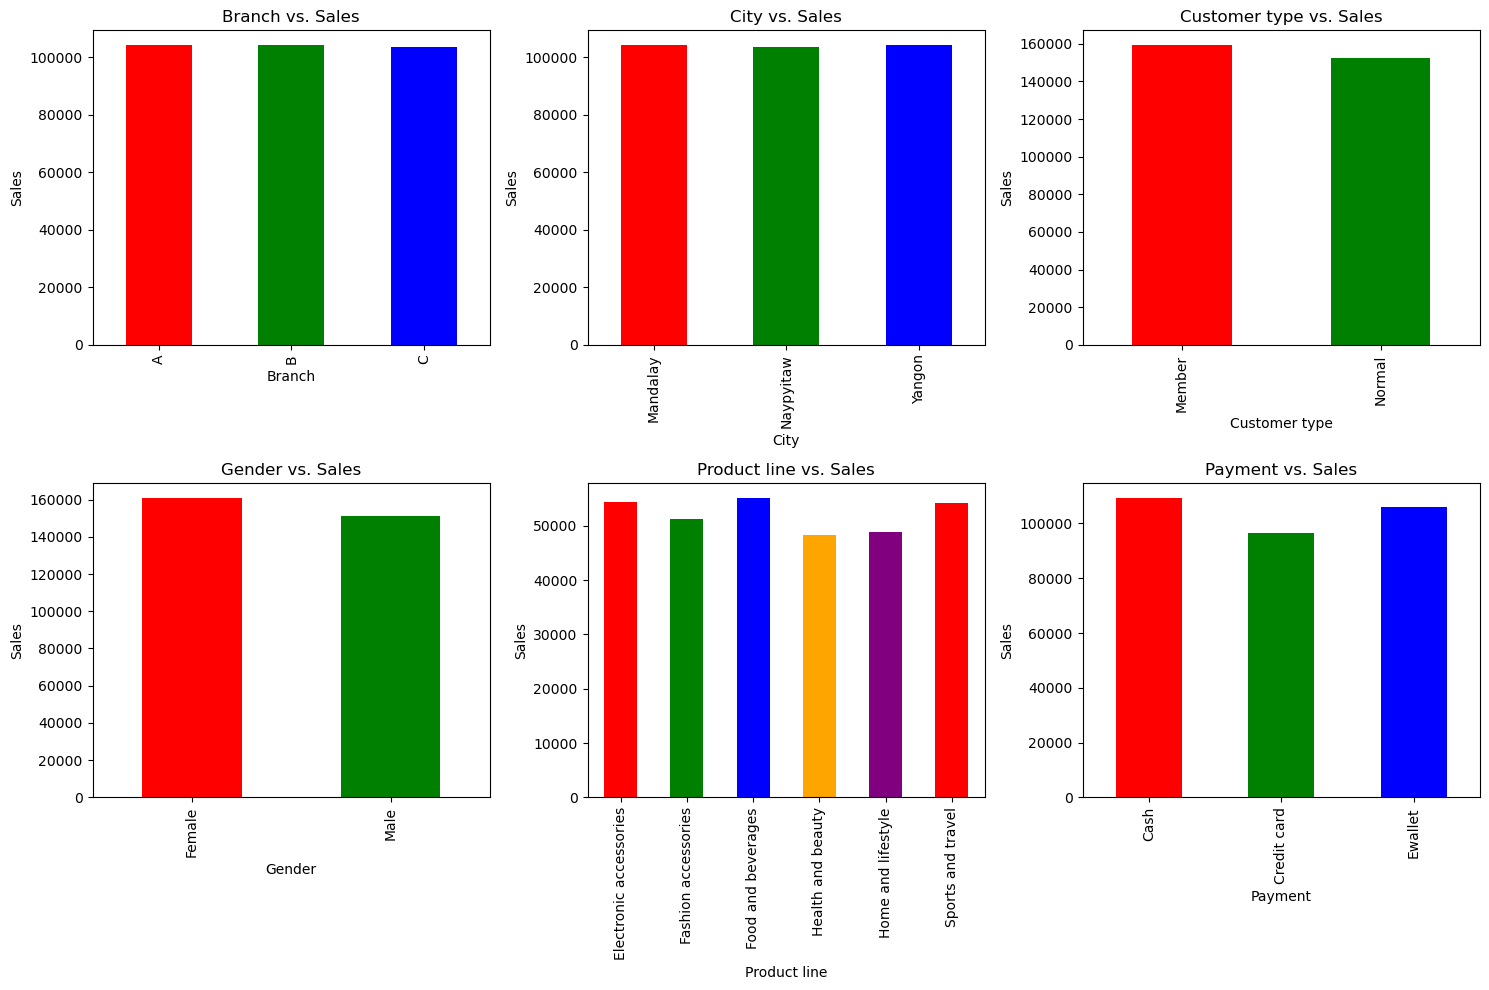

In [25]:
# Define a list of colors
colors = ['red', 'green', 'blue', 'orange', 'purple']

num_cols = 3
num_rows = (len(categorical_features) - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, feature in enumerate(categorical_features):
    row = i // num_cols
    col = i % num_cols
    
    categories = df[feature].unique()
    num_categories = len(categories)
    
    # Generate a unique color for each category within each plot
    bar_colors = [colors[j % len(colors)] for j in range(num_categories)]
    
    df.groupby(feature)['Sales'].sum().plot(kind='bar', ax=axes[row, col], color=bar_colors)
    
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Sales')
    axes[row, col].set_title(f'{feature} vs. Sales')

plt.tight_layout()
plt.show()

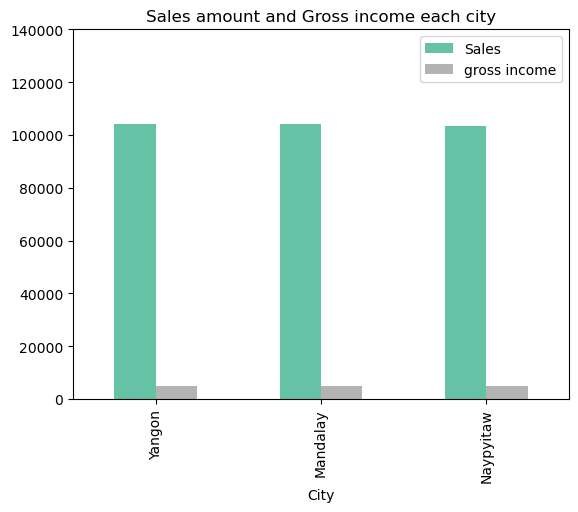

In [26]:
# Sales, gross income across cities.

city_sales=round(df.groupby(['City'])[['Sales','gross income']].sum().sort_values(by='Sales',ascending=False),0)
city_sales.plot(kind='bar',cmap='Set2')
plt.ylim([0,140000])
plt.title('Sales amount and Gross income each city')
plt.show()

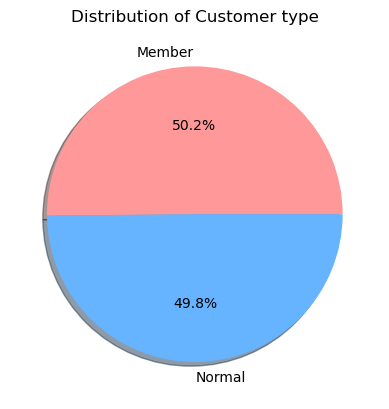

In [27]:
# Distribution of Customer based on Customer type

customer_type=df['Customer type'].value_counts()

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.pie(customer_type,labels=customer_type.index,autopct='%.1f%%',shadow=True,colors=colors)
plt.title('Distribution of Customer type')
plt.show()

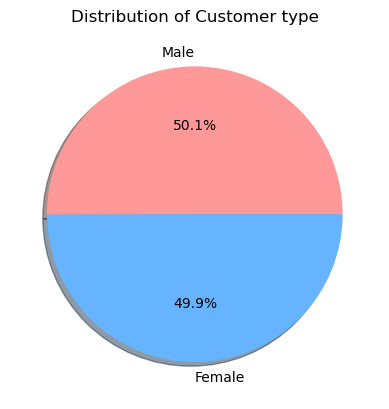

In [28]:
# Distribution of Customer based on gender

customer_type=df['Gender'].value_counts()

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.pie(customer_type,labels=customer_type.index,autopct='%.1f%%',shadow=True,colors=colors)
plt.title('Distribution of Customer type')
plt.show()

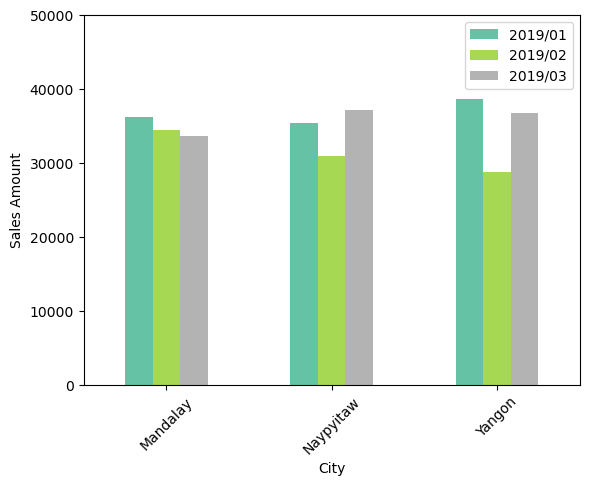

In [29]:
# Storewise monthly Sales

city_total = round(df.groupby(['City', 'Year', 'Month'])['Sales'].sum(), 0)
city_total = city_total.unstack(level=[1, 2], fill_value=0)

city_total.plot(kind='bar', cmap='Set2')
plt.ylim([0, 50000])
plt.xticks(rotation=45)
plt.ylabel('Sales Amount')
plt.legend(["2019/01", "2019/02", "2019/03"], fontsize='10')
plt.show()


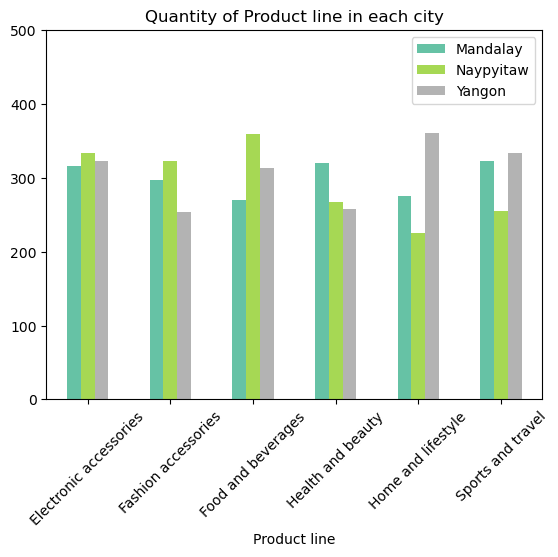

In [30]:
# Category-wise and Quantity-wise product Sales

product_city_qty = round(df.groupby(['Product line', 'City'])['Quantity'].sum(), 0)
product_city_qty = product_city_qty.unstack(level='City', fill_value=0)

product_city_qty.plot(kind='bar', cmap='Set2')
plt.legend(['Mandalay', 'Naypyitaw', 'Yangon'], fontsize=10)
plt.ylim([0, 500])
plt.xticks(rotation=45)
plt.title('Quantity of Product line in each city')
plt.show()